In [83]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [84]:
#import the data from a csv-file
df = pd.read_csv('data/central_area_expensive_houses.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


## Visualise the data

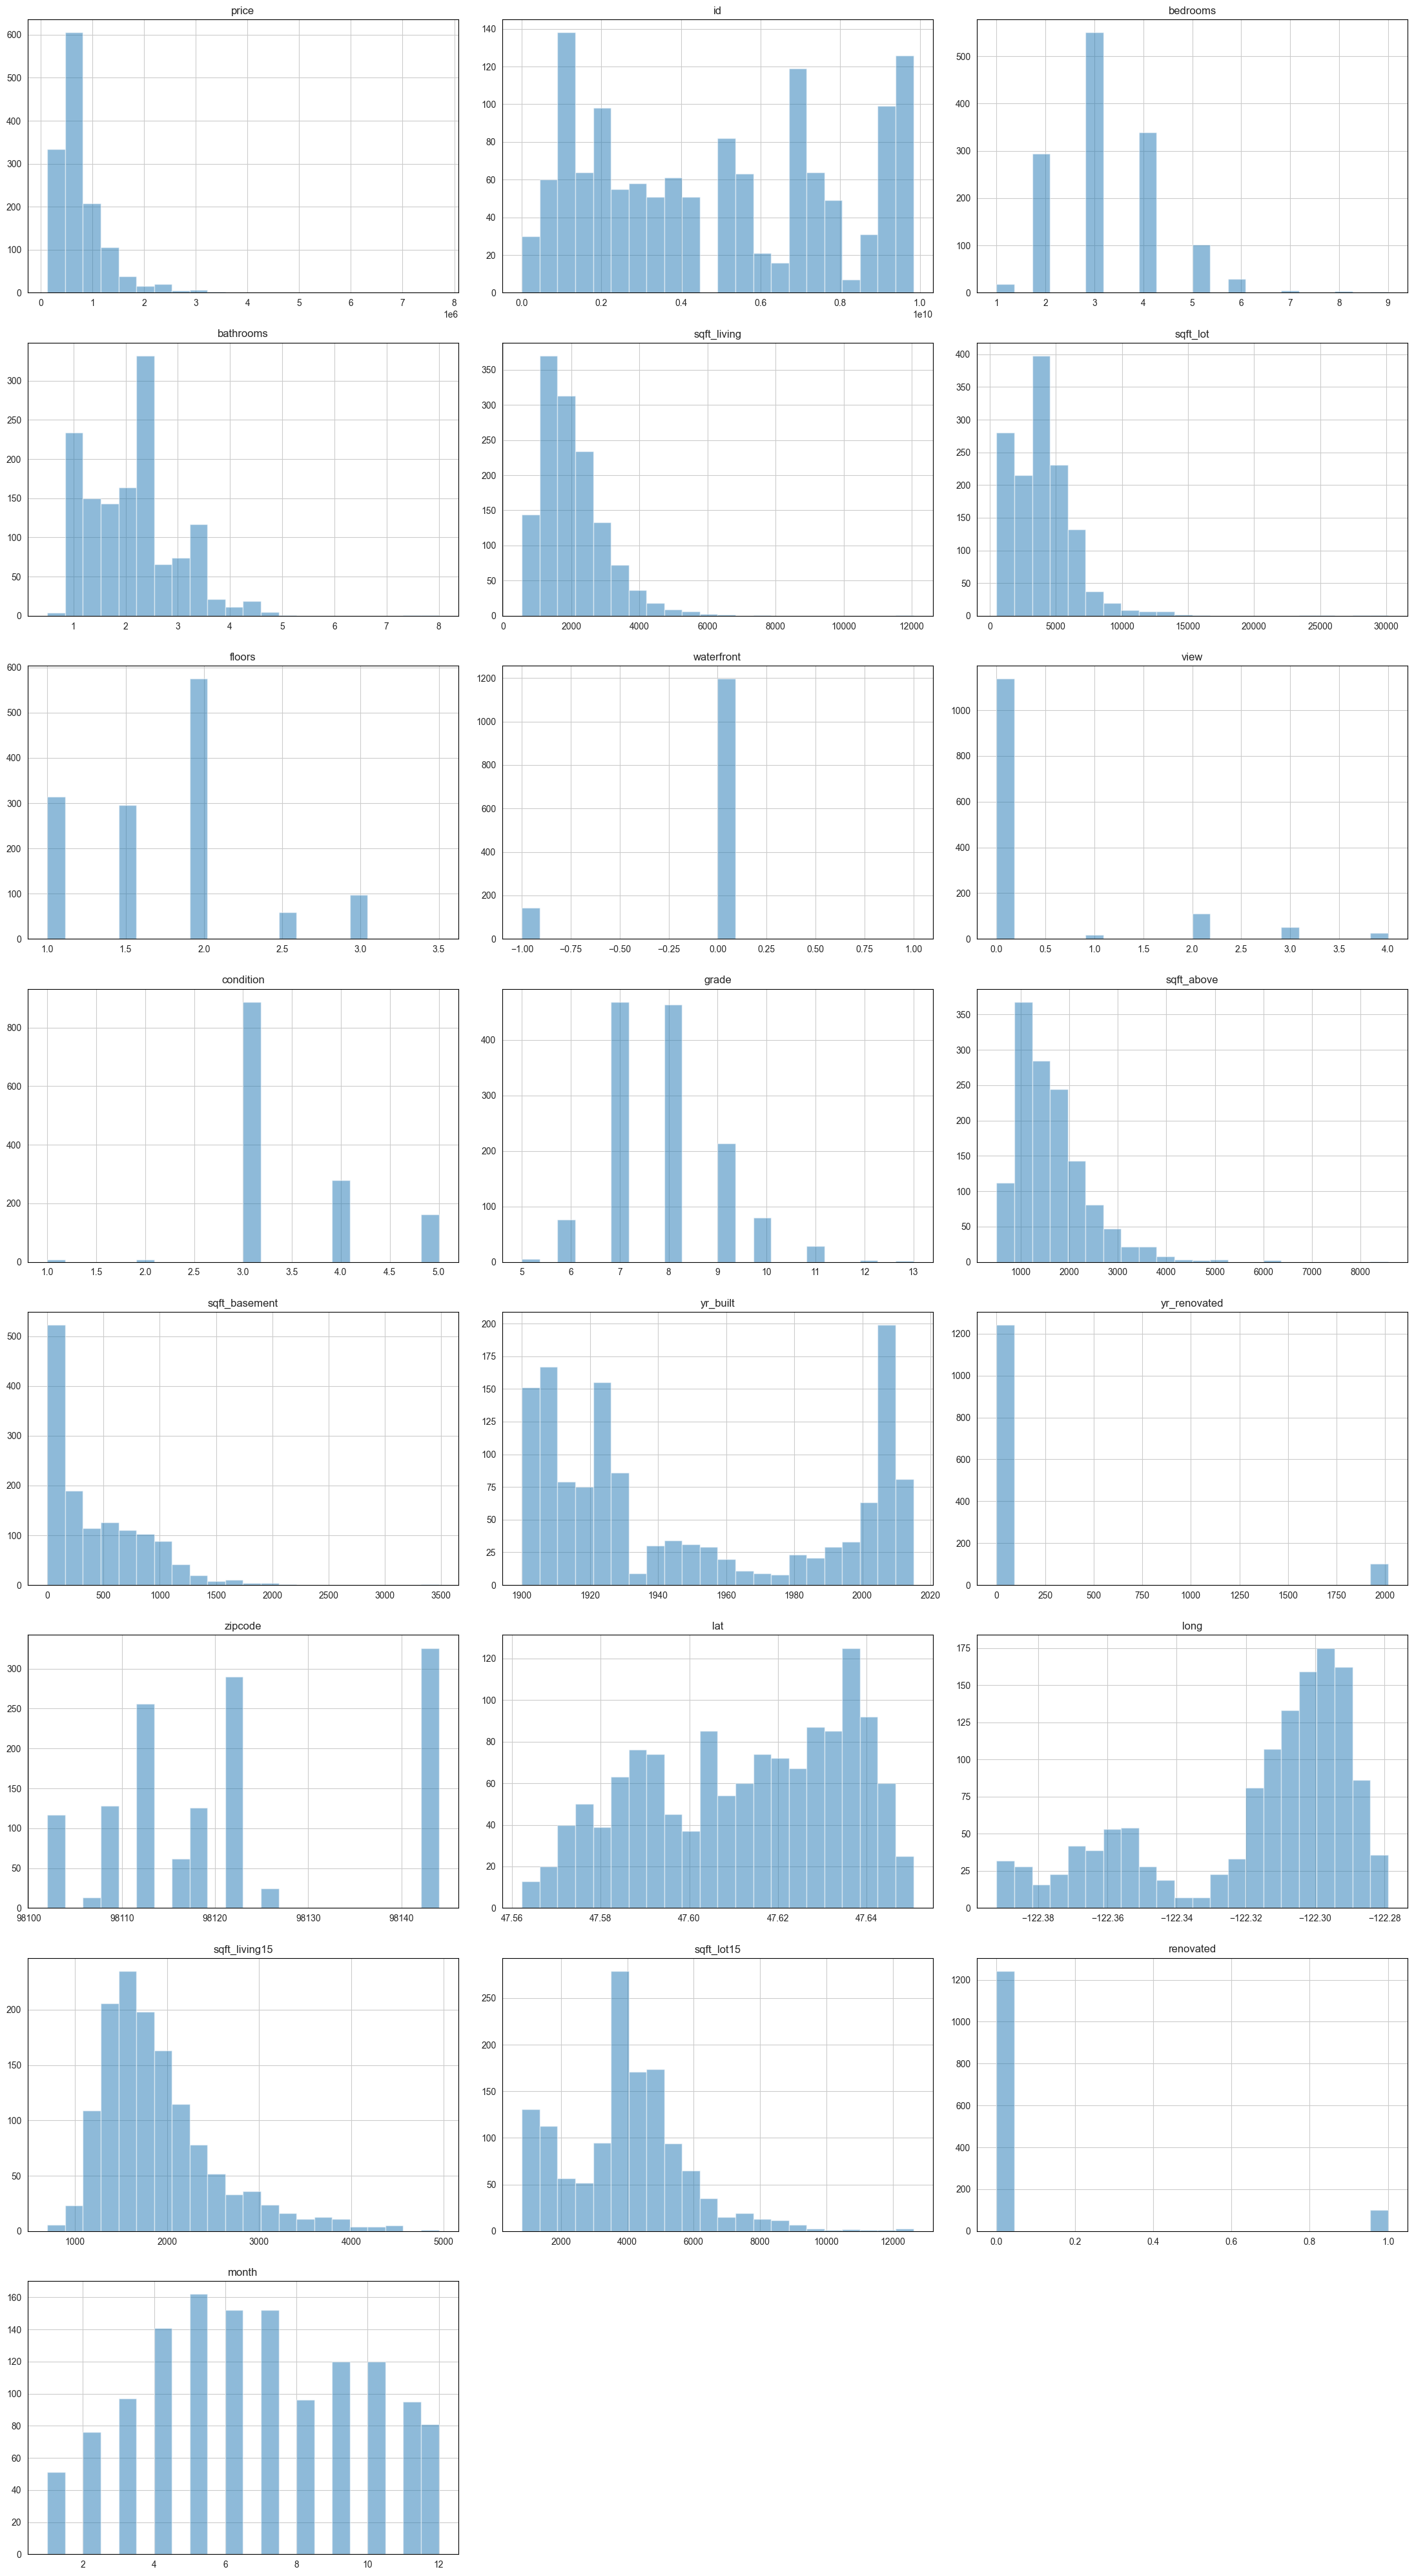

In [85]:

# Filter only numeric columns
numeric_df = df.select_dtypes(include=[int, float])

# Ensure there are numeric columns
if numeric_df.empty:
    raise ValueError("No numeric columns to plot")

# Number of numeric columns
num_numeric_cols = numeric_df.shape[1]

# Calculate the number of rows and columns for the subplots
ncols = 3  # Number of columns per row
nrows = (num_numeric_cols + ncols - 1) // ncols  # Number of rows needed

# Plot histograms with adjusted parameters
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 5 * nrows))  # Adjust the figsize and layout as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numeric column
for i, column in enumerate(numeric_df.columns):
    numeric_df[column].hist(ax=axes[i], bins=22, alpha=0.5)
    axes[i].set_title(column)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust subplots to fit into the figure area.
# Show the plot
plt.show()

findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.


<Axes: >

findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.


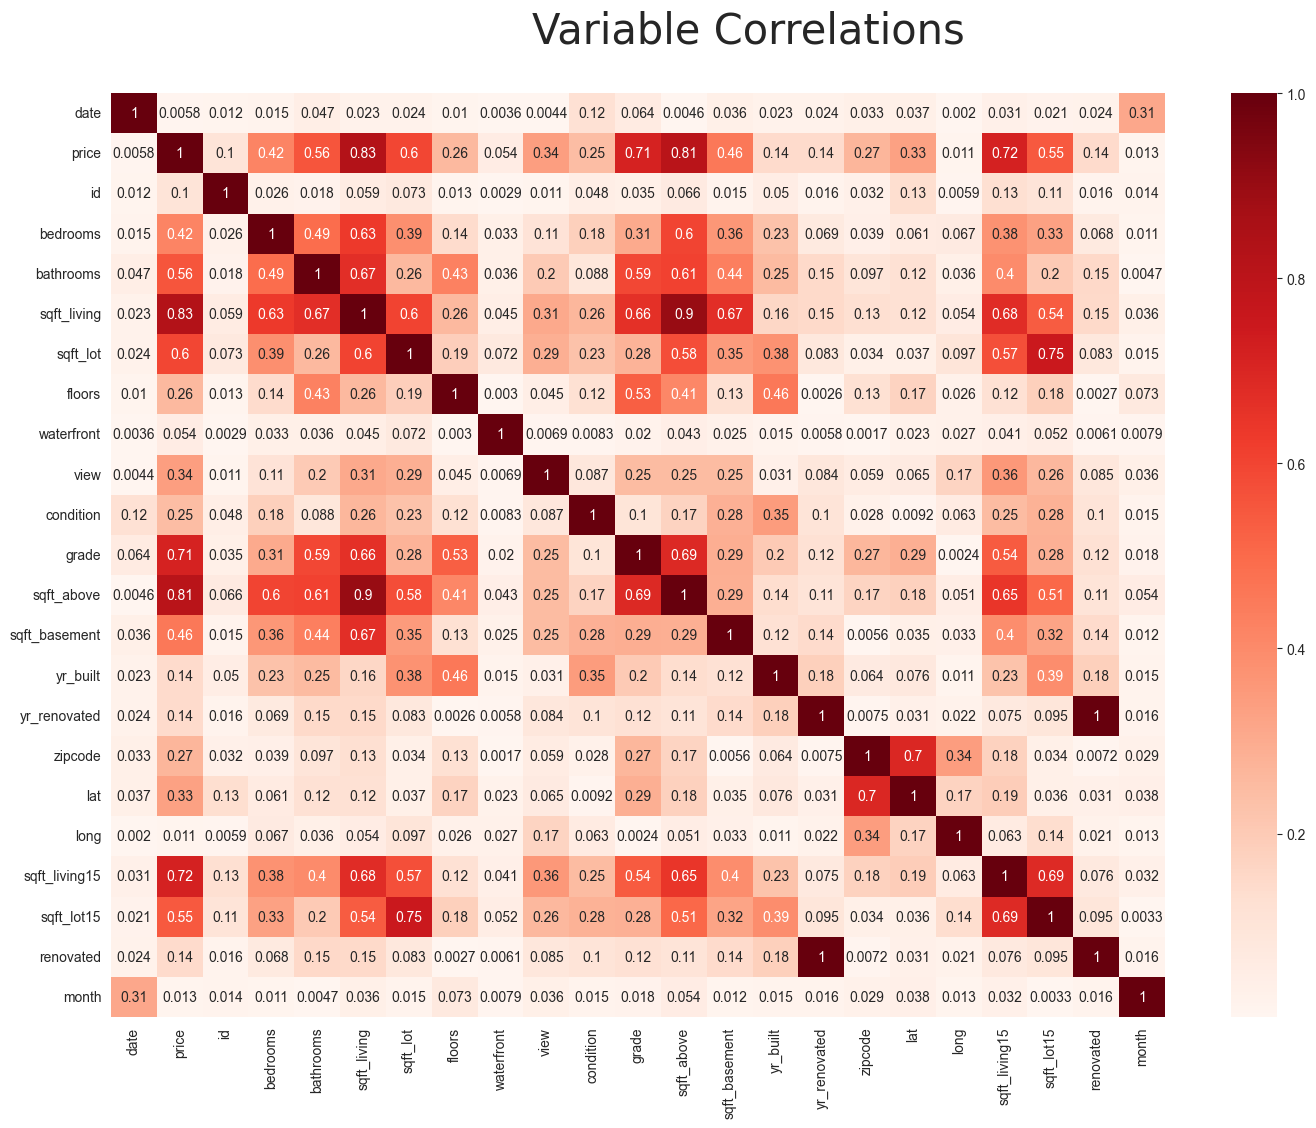

In [86]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
heatmap

In [87]:
# Calculate correlations with 'Price'
correlations = df.corr()['price'].sort_values(ascending=False)

# Display the correlations
print("Correlations with Price:")
print(correlations)

Correlations with Price:
price            1.00
sqft_living      0.83
sqft_above       0.81
sqft_living15    0.72
grade            0.71
sqft_lot         0.60
bathrooms        0.56
sqft_lot15       0.55
sqft_basement    0.46
bedrooms         0.42
view             0.34
lat              0.33
floors           0.26
condition        0.25
renovated        0.14
yr_renovated     0.14
waterfront       0.05
month            0.01
long             0.01
date             0.01
id              -0.10
yr_built        -0.14
zipcode         -0.27
Name: price, dtype: float64


In [88]:
price = df['price']
bath = df['bathrooms']
bed = df['bedrooms']
grade = df['grade']
sqft_living15 = df['sqft_living15']
floors = df['floors']
view = df['view']
sqft_living = df['sqft_living']
sqft_above = df['sqft_above']

findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.


<Figure size 800x500 with 0 Axes>

findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.


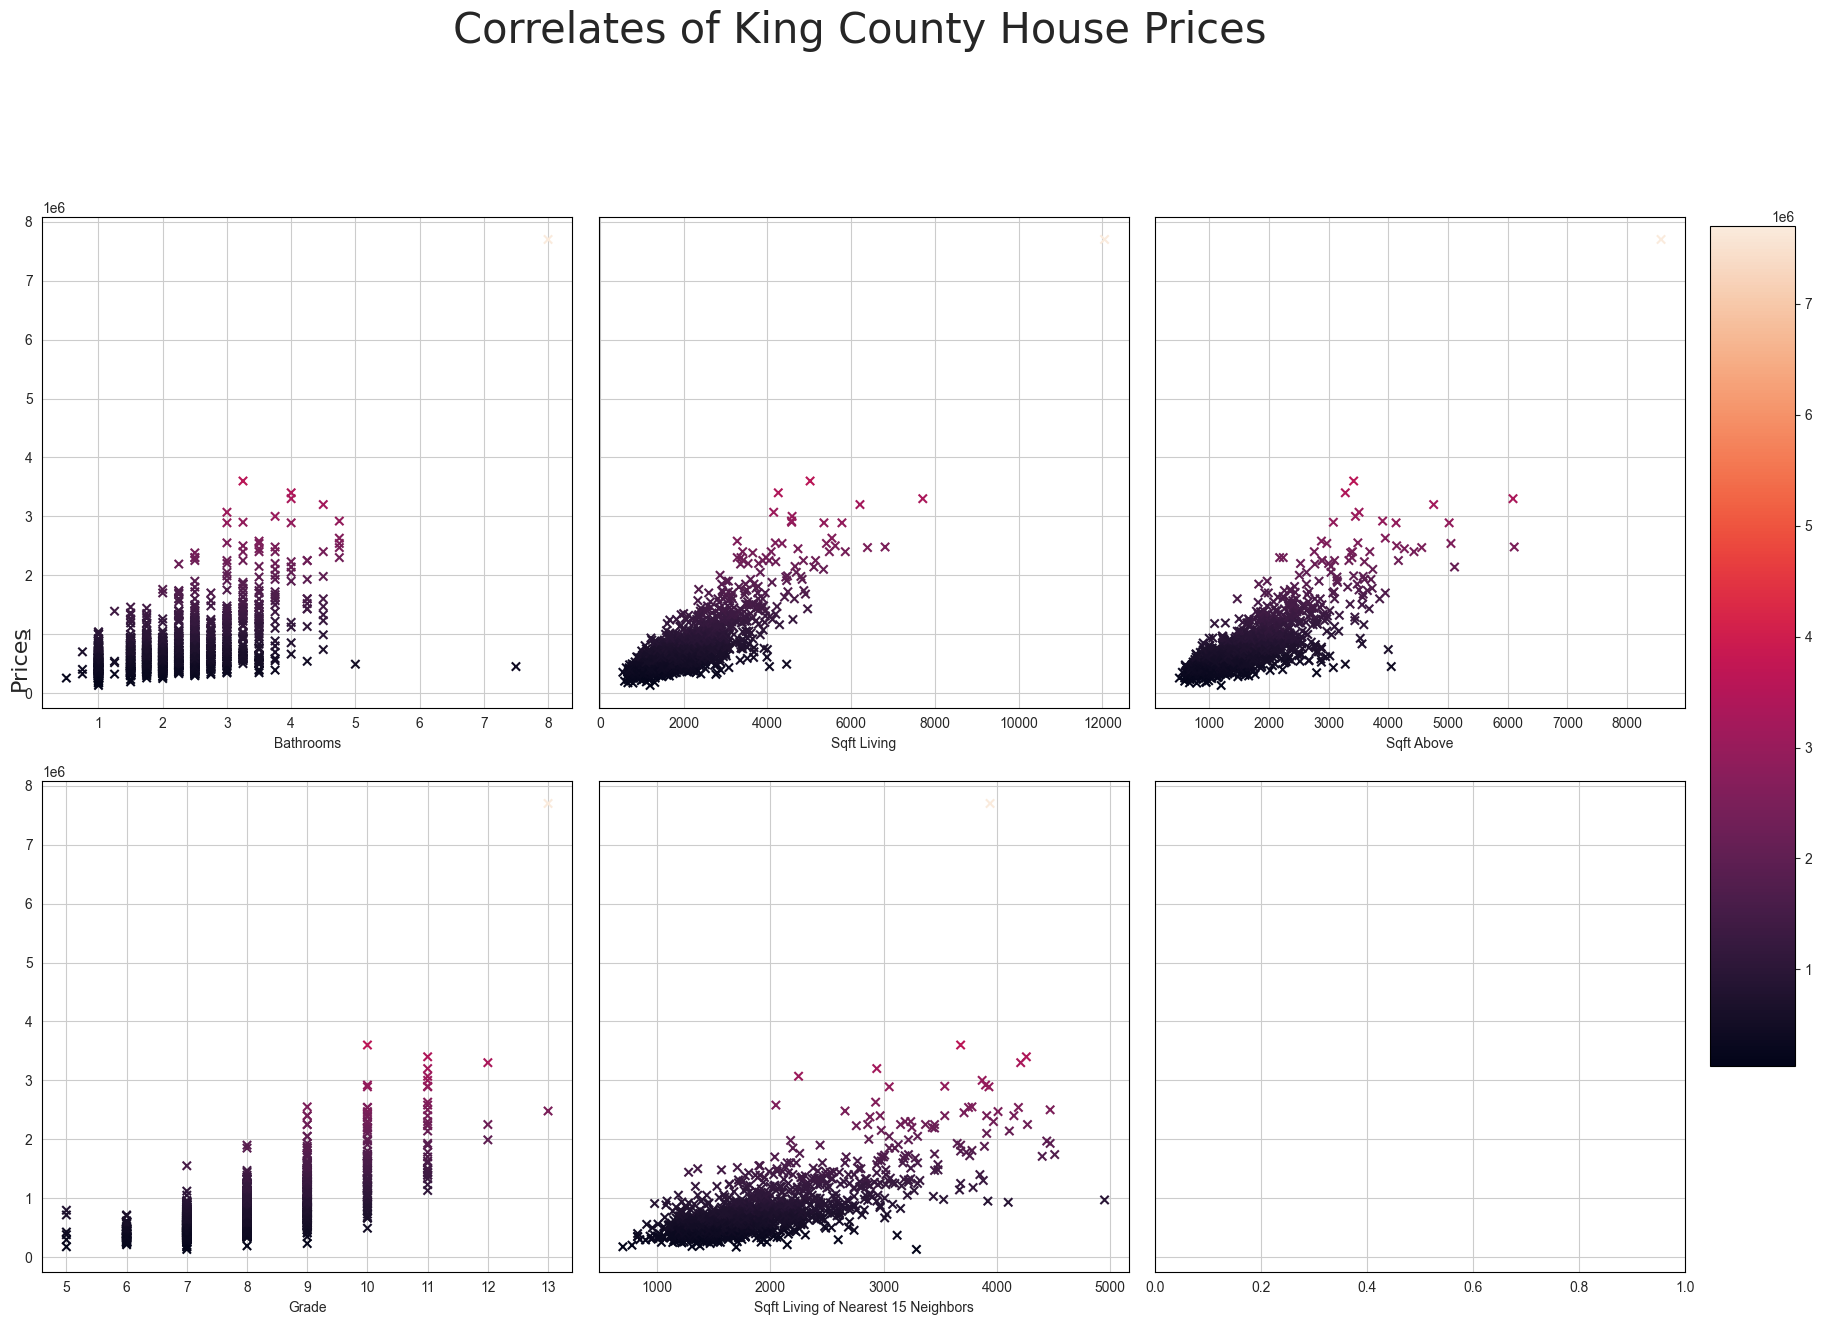

In [89]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(bath, price, c = price, marker = "x")
axes[0][0].set_xlabel('Bathrooms')



axes[1][0].scatter(grade, price, c = price, marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(sqft_living15, price, c = price, marker = "x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')



sc = axes[0][1].scatter(sqft_living, price, c = price, marker = "x")
axes[0][1].set_xlabel('Sqft Living')

sc = axes[0][2].scatter(sqft_above, price, c = price, marker = "x")
axes[0][2].set_xlabel('Sqft Above')

cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

f.colorbar(sc, cax=cbar_ax)

f.tight_layout()
plt.show()

In [90]:
df["id"].duplicated().value_counts()

id
False    1338
True        5
Name: count, dtype: int64

In [91]:
import pandas as pd

# Load the dataset

# Check for duplicate 'id' entries
duplicate_sales = df[df.duplicated(subset='id', keep=False)]

# Count the occurrences of each 'id'
id_counts = df['id'].value_counts()

# Filter to include only 'id's that appear more than once
multiple_sales_ids = id_counts[id_counts > 1].index

# Create a DataFrame with houses sold more than once
multiple_sales = df[df['id'].isin(multiple_sales_ids)]

# Display the first few rows of the DataFrame
multiple_sales[['id','price','date','yr_renovated']].head(30)

# Save the filtered DataFrame to a new CSV file (optional)


,id,price,date,yr_renovated
57,9834200885,360000.00,2014-07-17,0
58,9834200885,550000.00,2015-04-20,0
375,9828200460,260000.00,2014-06-27,0
376,9828200460,430000.00,2015-01-06,0
808,5332200530,910000.00,2014-06-13,0
809,5332200530,1020000.00,2015-04-24,0
842,1250201165,441000.00,2014-11-21,0
843,1250201165,474500.00,2015-03-17,0
913,9834200305,350000.00,2014-07-16,0
914,9834200305,615000.00,2015-02-10,0


In [92]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month and add it as a new column
df['month'] = df['date'].dt.month


In [93]:
df.head()

,date,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,month
0,2014-06-26,937000.00,1794500383,3.00,1.75,2450.00,2691.00,2.00,0,0,...,700.00,1915,0,98119,47.64,-122.36,1760.00,3573.00,0,6
1,2014-12-01,667000.00,3303700376,3.00,1.00,1400.00,1581.00,1.50,0,0,...,0.00,1909,0,98112,47.62,-122.31,1860.00,3861.00,0,12
2,2014-10-28,685000.00,9270200160,3.00,1.00,1570.00,2280.00,2.00,0,0,...,0.00,1922,0,98119,47.64,-122.36,1580.00,2640.00,0,10
3,2014-06-03,425000.00,1189001180,3.00,2.25,1660.00,6000.00,1.00,0,0,...,550.00,1979,0,98122,47.61,-122.30,1440.00,4080.00,0,6
4,2014-11-20,317625.00,3253500160,3.00,2.75,2770.00,3809.00,1.50,0,0,...,1000.00,1925,0,98144,47.57,-122.30,1440.00,4000.00,0,11


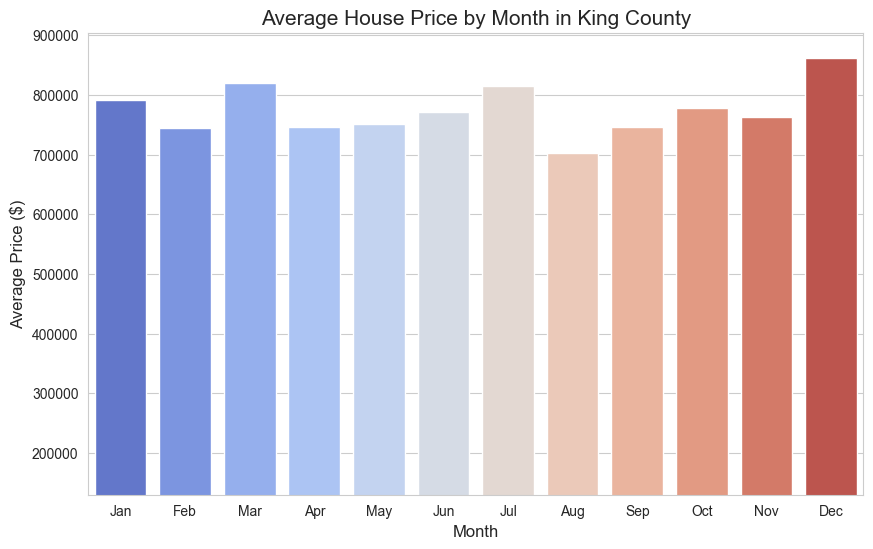

In [94]:


# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month and add it as a new column
df['month'] = df['date'].dt.month

# Group by the 'month' column and calculate the average price
monthly_avg_price = df.groupby('month')['price'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='price', data=monthly_avg_price, palette='coolwarm')

# Add titles and labels
plt.title('Average House Price by Month in King County', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Set custom x-axis tick labels
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.ylim(df["price"].min())
# Show the plot
plt.show()


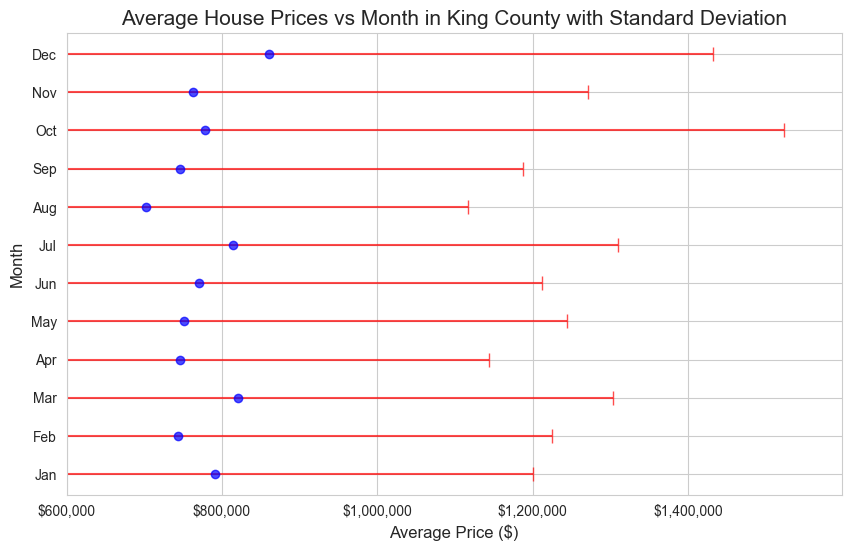

In [95]:
from matplotlib.ticker import FuncFormatter

monthly_stats = df.groupby('month')['price'].agg(['mean', 'std']).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(monthly_stats['mean'], monthly_stats['month'], xerr=monthly_stats['std'], fmt='o', color='b', ecolor='r', alpha=0.7, capsize=5)

# Add titles and labels
plt.title('Average House Prices vs Month in King County with Standard Deviation', fontsize=15)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.yticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Function to format the x-axis ticks as full numbers
def format_ticks(x, pos):
    return f'${x:,.0f}'
# Show grid
plt.grid(True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.xlim(600000.0)


# Show plot
plt.show()

130000.0


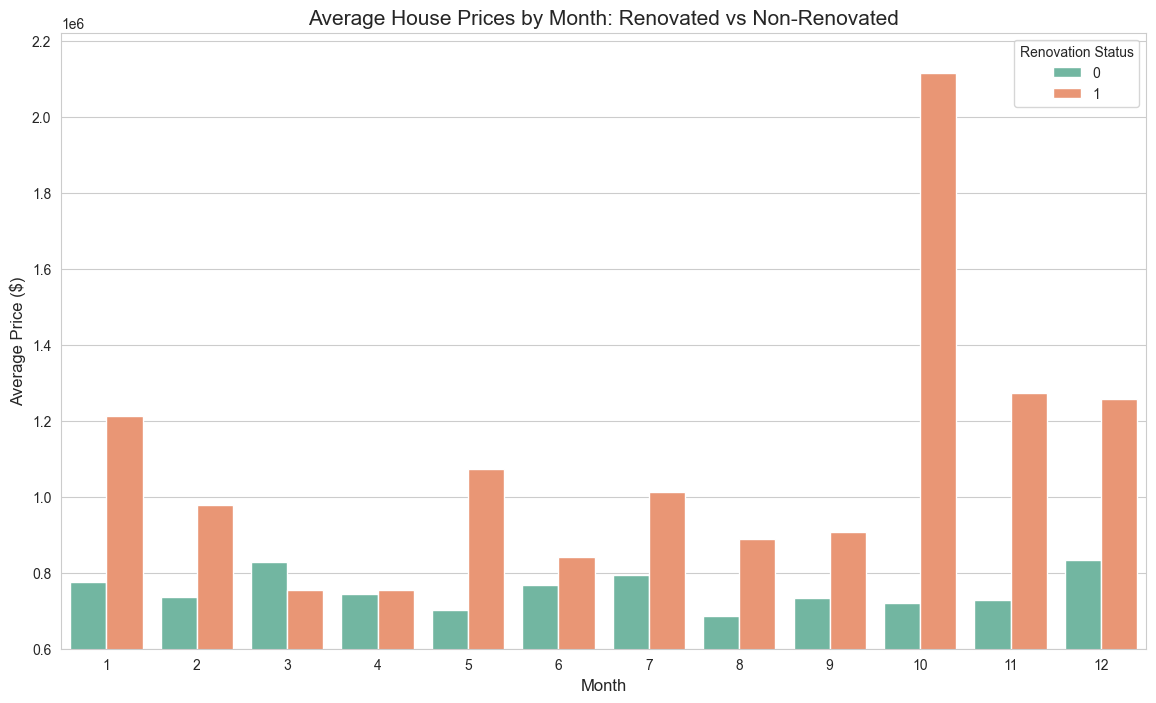

In [96]:

# Calculate the average price for renovated and non-renovated houses for each month
average_prices = df.groupby(['month', 'renovated'])['price'].mean().reset_index()


# Calculate the average price for renovated and non-renovated houses for each month
average_prices = df.groupby(['month', 'renovated'])['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=average_prices, x='month', y='price', hue='renovated', palette='Set2')

# Add titles and labels
plt.title('Average House Prices by Month: Renovated vs Non-Renovated', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

plt.ylim(600000.0)
plt.legend(title='Renovation Status')
print(df["price"].min())
# Show plot
plt.show()

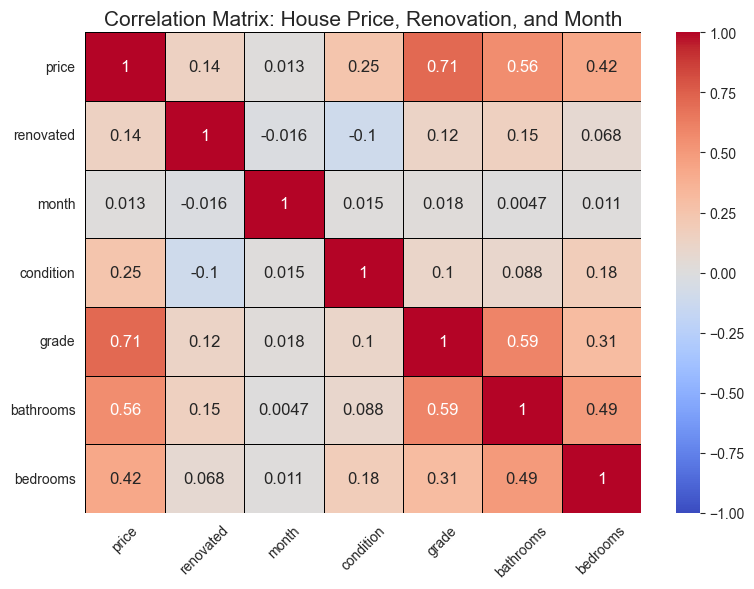

In [97]:
correlation_data = df[['price', 'renovated', 'month','condition','grade','bathrooms','bedrooms']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            linewidths=0.5, linecolor='black', annot_kws={"fontsize": 12})

plt.title('Correlation Matrix: House Price, Renovation, and Month', fontsize=15)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

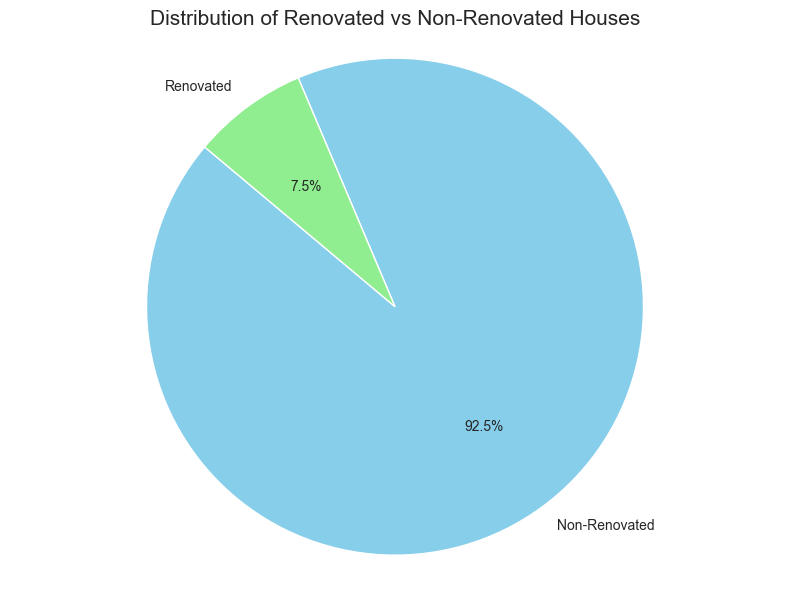

In [98]:
# Count the number of renovated and non-renovated houses
renovation_counts = df['renovated'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(renovation_counts, labels=['Non-Renovated', 'Renovated'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Renovated vs Non-Renovated Houses', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Show plot
plt.show()

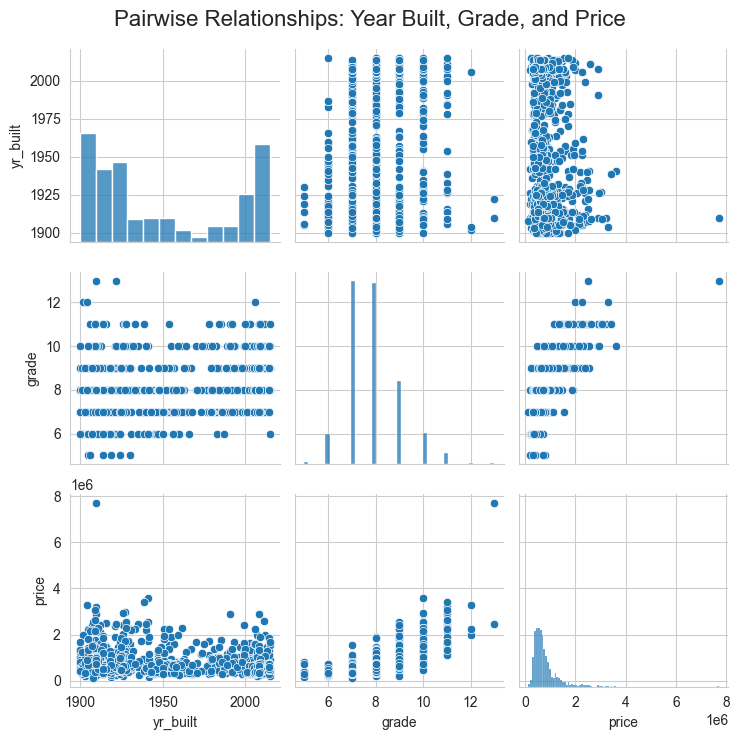

In [99]:
# Select relevant columns
df_subset = df[['yr_built', 'grade', 'price']]

# Plotting
sns.pairplot(df_subset)
plt.suptitle('Pairwise Relationships: Year Built, Grade, and Price', fontsize=16)
plt.tight_layout()
plt.show()

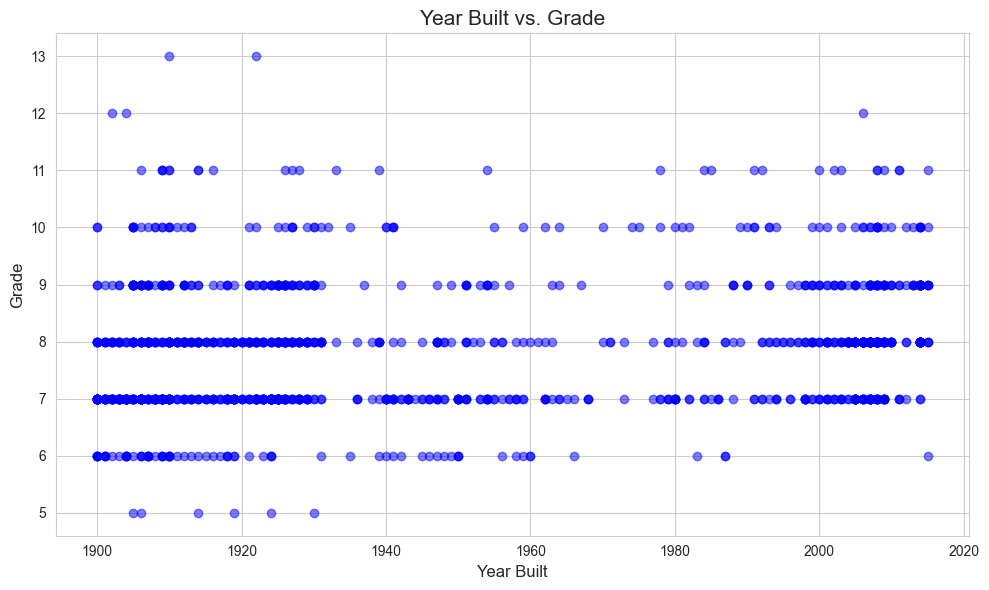

In [100]:

# Selecting relevant columns
df_subset = df[['yr_built', 'grade']]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_subset['yr_built'], df_subset['grade'], alpha=0.5, color='b')
plt.title('Year Built vs. Grade', fontsize=15)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Grade', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

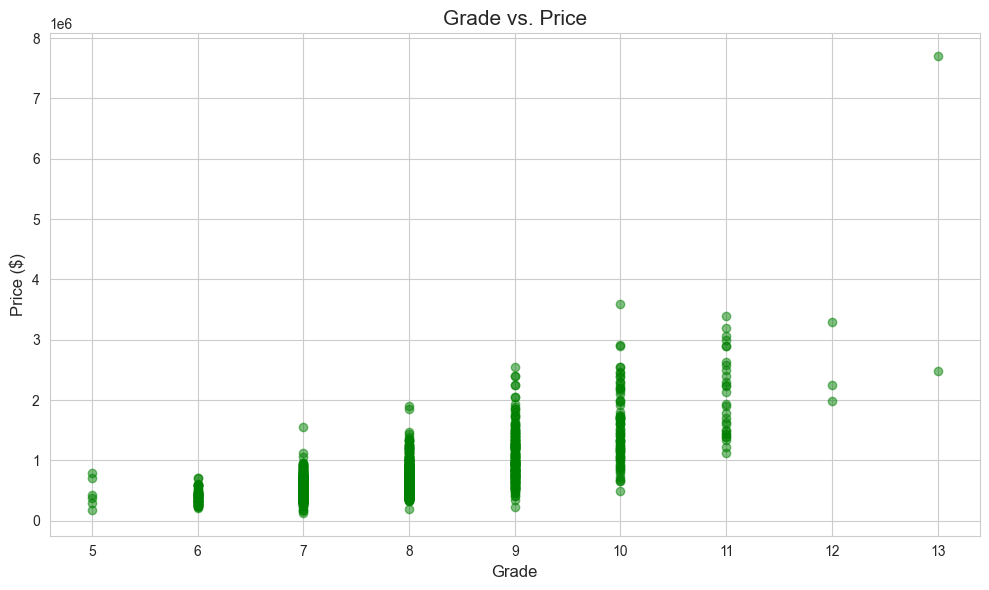

In [101]:
df_subset = df[['price', 'grade']]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_subset['grade'], df_subset['price'], alpha=0.5, color='g')
plt.title('Grade vs. Price', fontsize=15)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

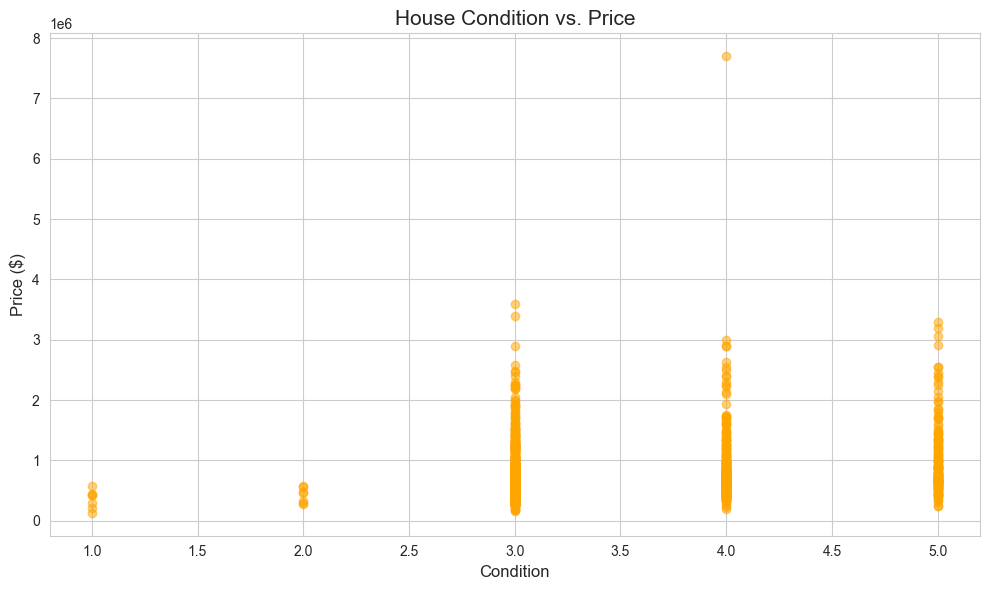

In [102]:
# Selecting relevant columns
df_subset = df[['condition', 'price']]
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_subset['condition'], df_subset['price'], alpha=0.5, color='orange')
plt.title('House Condition vs. Price', fontsize=15)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

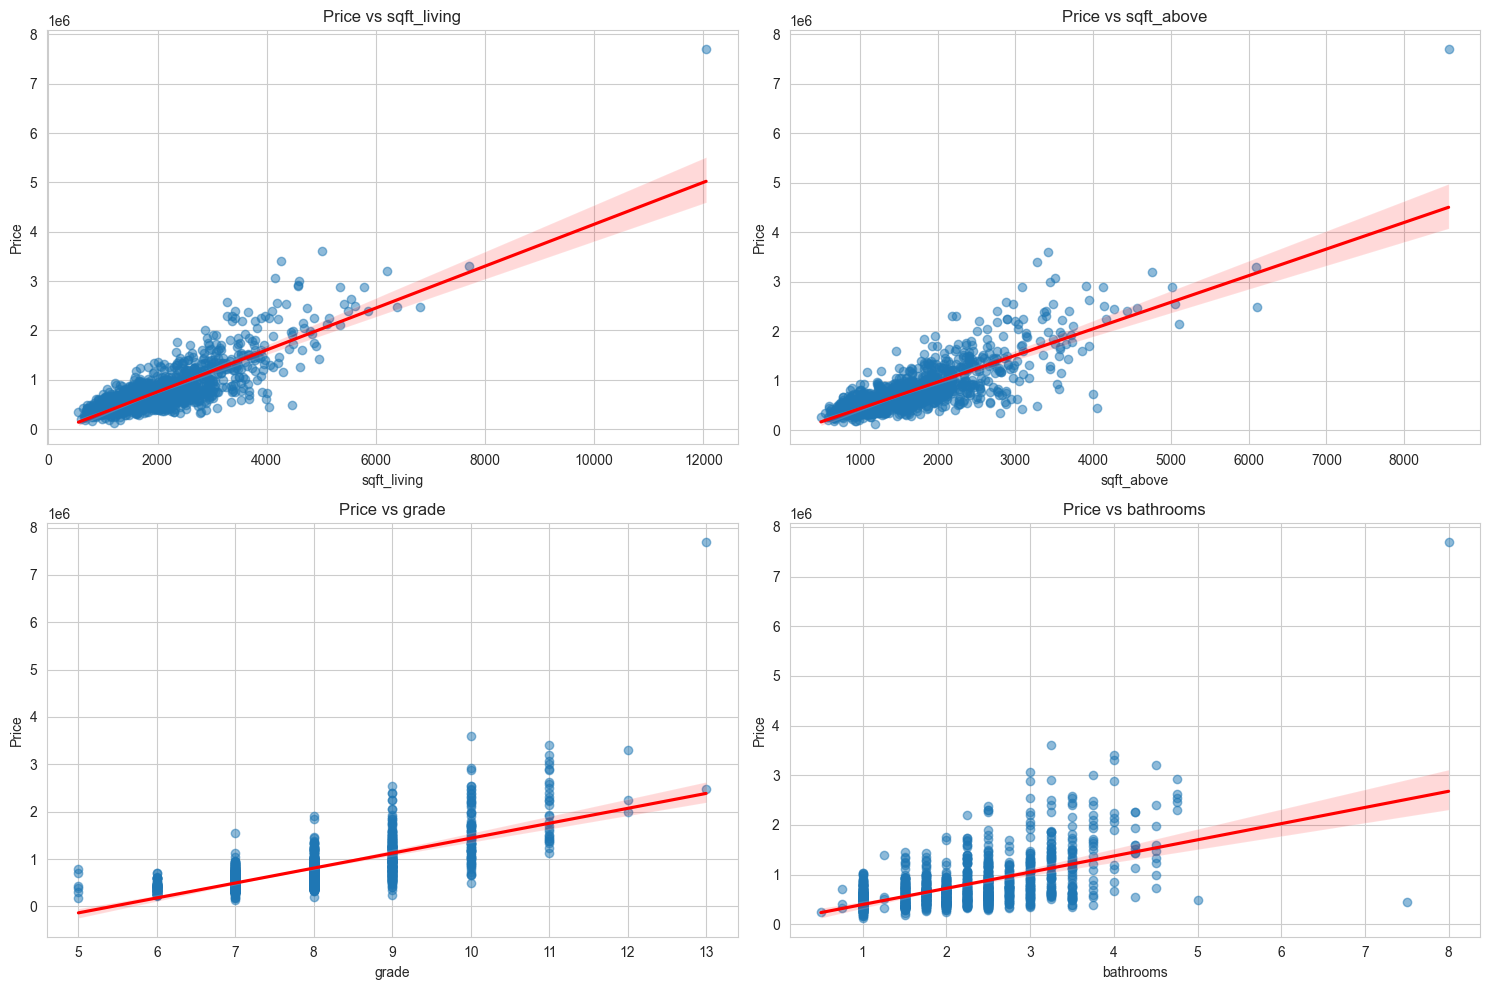

In [103]:

# Variables of interest
variables = ['sqft_living', 'sqft_above', 'grade', 'bathrooms']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Adjust the layout as needed

# Plot scatter plots with regression lines
for i, variable in enumerate(variables):
    row, col = divmod(i, 2)
    sns.regplot(x=variable, y='price', data=df, ax=axes[row, col], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axes[row, col].set_title(f'Price vs {variable}')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Price')

plt.tight_layout()
plt.show()